In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
data_ir = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris_class = iris.target
#Оставим два признака - sepal_length и sepal_width
data_iris = data_ir[['sepal length (cm)', 'sepal width (cm)']]
data_iris['variety'] = data_iris_class #добавляем колонку с классом

<ipython-input-19-9703abb8fa96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iris['variety'] = data_iris_class


,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [31]:
# импортируем LDA-функционал и разделяем данные на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_iris, data_iris_class, test_size=0.25)

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train) #обучаем данные

LinearDiscriminantAnalysis()

In [33]:
lda.predict(x_test) # делаем прогноз на тестовой выборке

array([1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0])

In [36]:
#посмотрим разницу фактических данных и прогнозных
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result

,0,1
0,1,1
1,2,2
2,1,2
3,2,2
4,2,2
5,0,0
6,2,2
7,0,0
8,1,1
9,0,0


In [38]:
#посмотрим точность нашей модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))
#модель получилась не совсем точной

0.8421052631578947

In [43]:
# посмотрим центры
lda.means_

array([[4.97714286, 3.39714286, 0.        ],
       [5.96      , 2.765     , 1.        ],
       [6.51621622, 2.95135135, 2.        ]])

TypeError: scatter() got multiple values for argument 's'

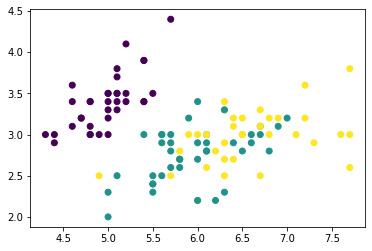

In [56]:
### визуализируем данные по классам
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], lda.means_[:, 2], c='r', s=20, marker='o')
#почему-то не удается увеличить размер центроидов, а без увеличения размера их совсем не видно